In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm

In [2]:
path="/lustre/ytzheng/"
Casename1 = 'ASTEX_warm2.6'

f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

In [3]:
f1 = f1.isel(time = slice(0,61))
nt = f1['time'].size
t_hours = np.arange(nt)

z = f1['z']/1000.

myfontsize = 12

In [4]:
def plt2D(fig, ax, x, y, z, ztitle, mycmap=cm.coolwarm, mylevels=[0.], extend = 'both',
         yrange = [0., 0.2], cbar = True, xlabel = False, ylabel = True, out = False):
    if len(mylevels) == 1:
        oax = ax.contourf(x,y,z, cmap = mycmap, extend = extend)
    else:
        oax = ax.contourf(x,y,z, cmap = mycmap, levels = mylevels, extend = extend)
    
    if cbar:
        cbar = fig.colorbar(oax, ax = ax, orientation='vertical', shrink=1.,
                           ticks = [mylevels.min(), 0, mylevels.max()])
        cbar.set_label(ztitle, fontsize=0.7*myfontsize)
    
    ax.set_ylim(yrange)
    ax.set_xlim([0, 31])
    if ylabel:
        ax.set_ylabel('Height (km)', fontsize=myfontsize) 
    
    if xlabel:
        ax.set_xlabel('Time (h)', fontsize=myfontsize) 
        
#     ax.grid(True)
    if out:
        return oax

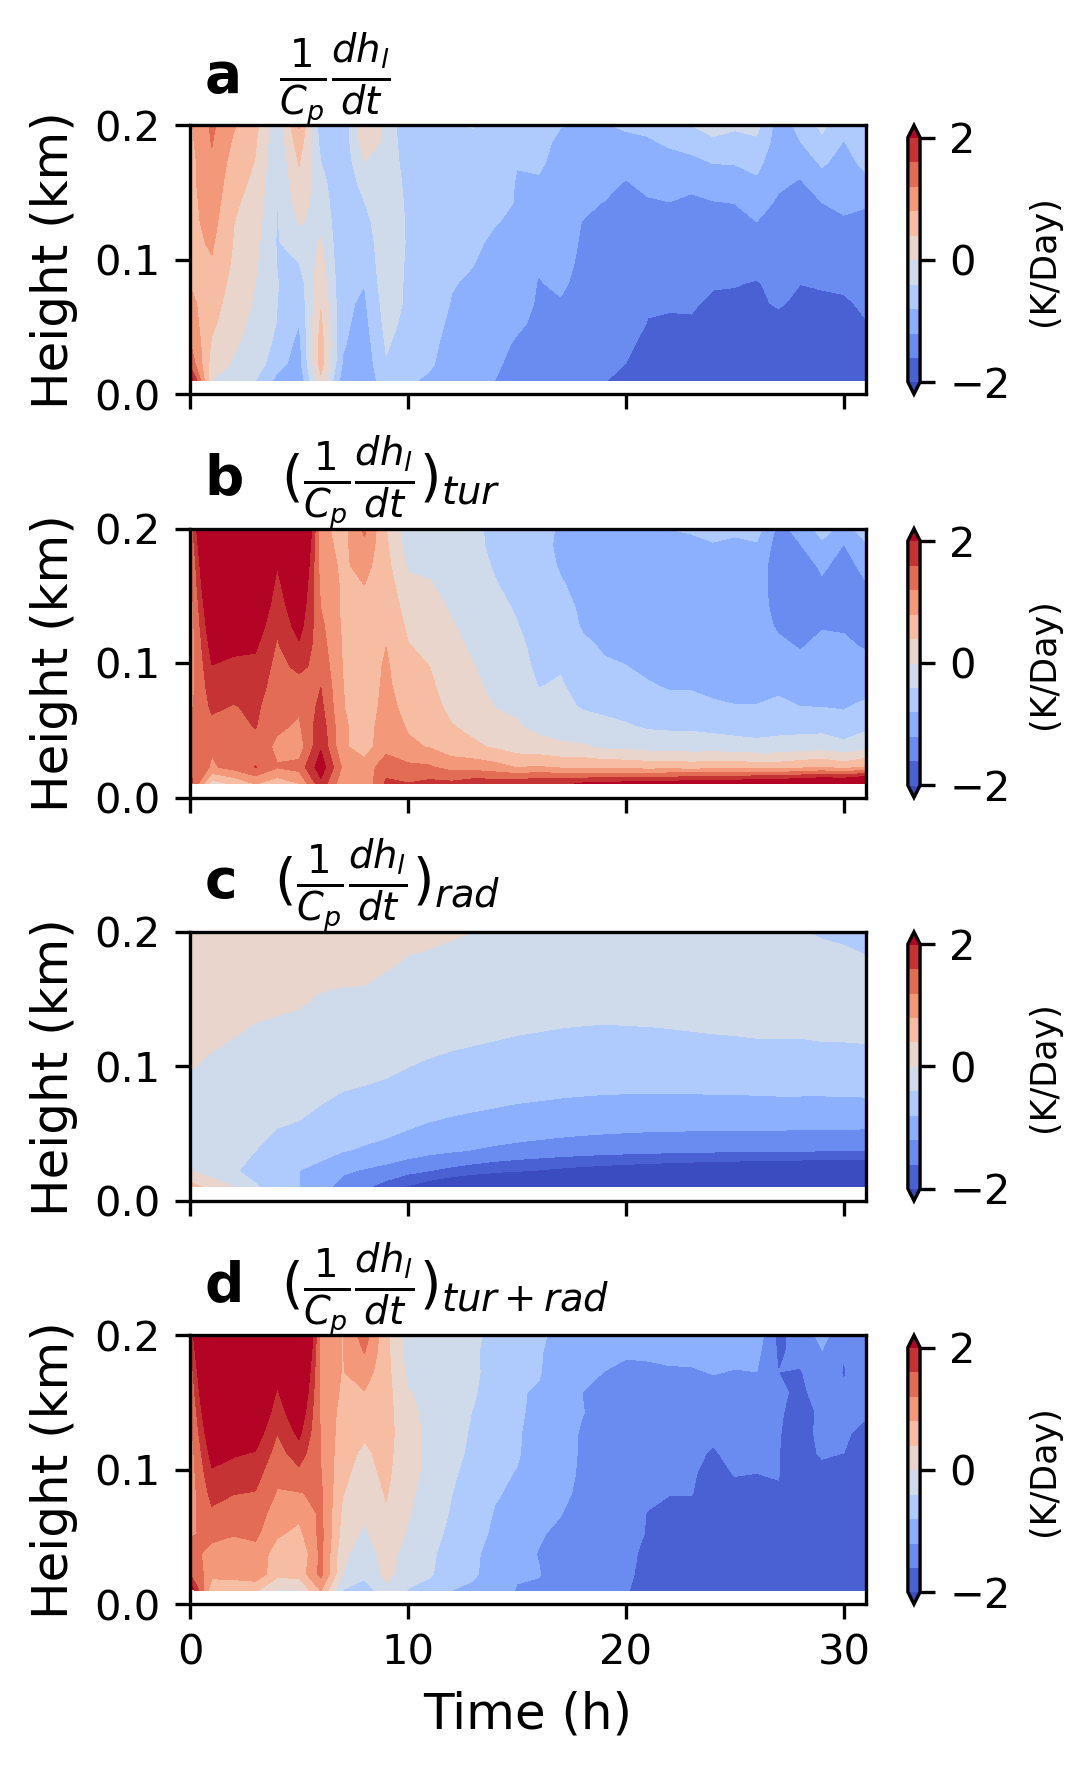

In [16]:
fig, axs = plt.subplots(ncols = 1,
                        nrows = 4,
                        sharex = True, sharey = True,
                        figsize=(9/2.54, (14)/2.54), dpi = 300)
plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

#
mylevels = np.linspace(-2, 2, 10 + 1)
var = f1["HLADV"] + f1["HLDIFF"] + f1["TTEND"] + f1["HLLAT"] + f1["HLRAD"] 
plt2D(fig, axs[0], t_hours, z, var.T, r"(K/Day)",
      mycmap=cm.coolwarm, mylevels=mylevels)

#
var = f1["HLADV"] + f1["HLDIFF"] 
plt2D(fig, axs[1], t_hours, z, var.T, r"(K/Day)",
      mycmap=cm.coolwarm, mylevels=mylevels)

#
var = f1["HLRAD"]
plt2D(fig, axs[2], t_hours, z, var.T, r"(K/Day)",
      mycmap=cm.coolwarm, mylevels=mylevels)

#
var = f1["HLADV"] + f1["HLDIFF"]  + f1["HLRAD"]
plt2D(fig, axs[3], t_hours, z, var.T, r"(K/Day)",
      mycmap=cm.coolwarm, mylevels=mylevels, xlabel = True)

for i, label in enumerate(('a  ' + r"$\frac{1}{C_p}\frac{dh_l}{dt}$",
                           'b  ' + r"$(\frac{1}{C_p}\frac{dh_l}{dt})_{tur}$",
                           'c  ' + r"$(\frac{1}{C_p}\frac{dh_l}{dt})_{rad}$",
                           'd  ' + r"$(\frac{1}{C_p}\frac{dh_l}{dt})_{tur+rad}$")):
    axs[i].text(0.02, 1.12, label, transform=axs[i].transAxes,
                fontsize=1.1*myfontsize, fontweight='bold')

fig.savefig('plot_result_bottom_PBL_cooling.png', dpi=fig.dpi, bbox_inches='tight')